In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
from sklearn import datasets, neighbors, linear_model,svm

digits = datasets.load_digits()
X = digits.data / digits.data.max()
y = digits.target

In [4]:
svc = svm.SVC(kernel='linear')
C_s = np.logspace(-10, 0, 10)


In [11]:
from sklearn.model_selection import cross_val_score

scores = list()
scores_std = list()
for C in C_s:
    svc.C = C
    this_scores = cross_val_score(svc, X, y, cv=5, n_jobs=1)
    
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

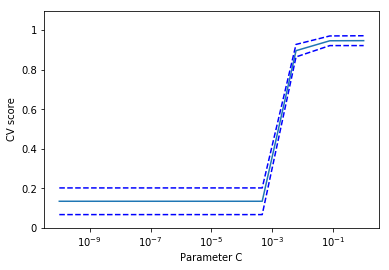

In [12]:
import matplotlib.pyplot as plt
plt.figure()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0, 1.1)
plt.show()

In [13]:
scores

[0.13526041386216708,
 0.13526041386216708,
 0.13526041386216708,
 0.13526041386216708,
 0.13526041386216708,
 0.13526041386216708,
 0.13526041386216708,
 0.8970769241232865,
 0.9471706960079287,
 0.9477422612395621]